In [1]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import warnings
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
print('Completed')

Completed


In [2]:
train=pd.read_csv('/content/drive/MyDrive/datasets/train.csv')
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
train['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [4]:
train.groupby('sentiment').nunique()

,textID,text,selected_text
sentiment,,,
negative,7781,7781,5861
neutral,11118,11117,11111
positive,8582,8582,5537


In [5]:
train = train[['selected_text','sentiment']]
train.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [6]:
train["selected_text"].fillna("No content", inplace = True)

In [7]:
def depure_data(data):
  url_pattern=re.compile(r'https?://\S+|www\.\S+')
  data=url_pattern.sub(r'',data)

  data = re.sub('\S*@\S*\s?', '', data)

  data = re.sub('\s+', ' ', data)

  data = re.sub("\'", "", data)

  return data

In [8]:
temp=[]
data_to_list=train['selected_text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))

In [9]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(temp))

print(data_words[:15])


[['have', 'responded', 'if', 'were', 'going'], ['sooo', 'sad'], ['bullying', 'me'], ['leave', 'me', 'alone'], ['sons', 'of'], ['some', 'shameless', 'plugging', 'for', 'the', 'best', 'rangers', 'forum', 'on', 'earth'], ['fun'], ['soooo', 'high'], ['both', 'of', 'you'], ['wow', 'just', 'became', 'cooler'], ['as', 'much', 'as', 'love', 'to', 'be', 'hopeful', 'reckon', 'the', 'chances', 'are', 'minimal', 'never', 'gonna', 'get', 'my', 'cake', 'and', 'stuff'], ['like'], ['dangerously'], ['lost'], ['test', 'test', 'from', 'the', 'lg', 'env']]


In [10]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:6])

['have responded if were going', 'sooo sad', 'bullying me', 'leave me alone', 'sons of', 'some shameless plugging for the best rangers forum on earth']


In [11]:
data=np.array(data)

In [12]:
labels=np.array(train['sentiment'])

y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

print(len(labels))

27481


In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
print('Completed')

Completed


In [14]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   68  146   41]
 [   0    0    0 ...    0  397   65]
 [   0    0    0 ...    0    0   11]
 ...
 [   0    0    0 ...  372   10    3]
 [   0    0    0 ...   24  542    4]
 [   0    0    0 ... 2424  199  657]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

20610 6871 20610 6871


Single LSTM layer model

In [16]:
model1=Sequential()
model1.add(layers.Embedding(max_words,20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
645/645 [==============================] - ETA: 0s - loss: 0.8194 - accuracy: 0.6423
Epoch 1: val_accuracy improved from -inf to 0.73817, saving model to best_model1.hdf5
645/645 [==============================] - 32s 39ms/step - loss: 0.8194 - accuracy: 0.6423 - val_loss: 0.6675 - val_accuracy: 0.7382
Epoch 2/70
645/645 [==============================] - ETA: 0s - loss: 0.5859 - accuracy: 0.7663
Epoch 2: val_accuracy improved from 0.73817 to 0.79319, saving model to best_model1.hdf5
645/645 [==============================] - 9s 14ms/step - loss: 0.5859 - accuracy: 0.7663 - val_loss: 0.5359 - val_accuracy: 0.7932
Epoch 3/70
645/645 [==============================] - ETA: 0s - loss: 0.5059 - accuracy: 0.8021
Epoch 3: val_accuracy improved from 0.79319 to 0.80876, saving model to best_model1.hdf5
645/645 [==============================] - 8s 12ms/step - loss: 0.5059 - accuracy: 0.8021 - val_loss: 0.5011 - val_accuracy: 0.8088
Epoch 4/70
645/645 [==============================]

In [17]:
model2=Sequential()
model2.add(layers.Embedding(max_words,40,input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation="softmax"))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/70
645/645 [==============================] - ETA: 0s - loss: 0.7940 - accuracy: 0.6563
Epoch 1: val_accuracy improved from -inf to 0.71925, saving model to best_model2.hdf5
645/645 [==============================] - 32s 44ms/step - loss: 0.7940 - accuracy: 0.6563 - val_loss: 0.6511 - val_accuracy: 0.7193
Epoch 2/70
645/645 [==============================] - ETA: 0s - loss: 0.5715 - accuracy: 0.7691
Epoch 2: val_accuracy improved from 0.71925 to 0.76539, saving model to best_model2.hdf5
645/645 [==============================] - 13s 20ms/step - loss: 0.5715 - accuracy: 0.7691 - val_loss: 0.5562 - val_accuracy: 0.7654
Epoch 3/70
645/645 [==============================] - ETA: 0s - loss: 0.4990 - accuracy: 0.8063
Epoch 3: val_accuracy improved from 0.76539 to 0.81531, saving model to best_model2.hdf5
645/645 [==============================] - 13s 20ms/step - loss: 0.4990 - accuracy: 0.8063 - val_loss: 0.4902 - val_accuracy: 0.8153
Epoch 4/70
645/645 [=============================

In [18]:
final_model=keras.models.load_model("best_model2.hdf5")

test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

215/215 - 2s - loss: 0.4443 - accuracy: 0.8453 - 2s/epoch - 9ms/step
Model accuracy:  0.845291793346405


In [19]:
predictions = final_model.predict(X_test)
print(predictions)

215/215 [==============================] - 2s 6ms/step
[[0.00361234 0.00428057 0.9921071 ]
 [0.00971146 0.9794882  0.01080028]
 [0.9039309  0.00961103 0.08645809]
 ...
 [0.01162008 0.11431974 0.87406015]
 [0.97575206 0.00737565 0.01687222]
 [0.81059736 0.17635894 0.01304372]]


<ipython-input-20-b10c5e1ebd73>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

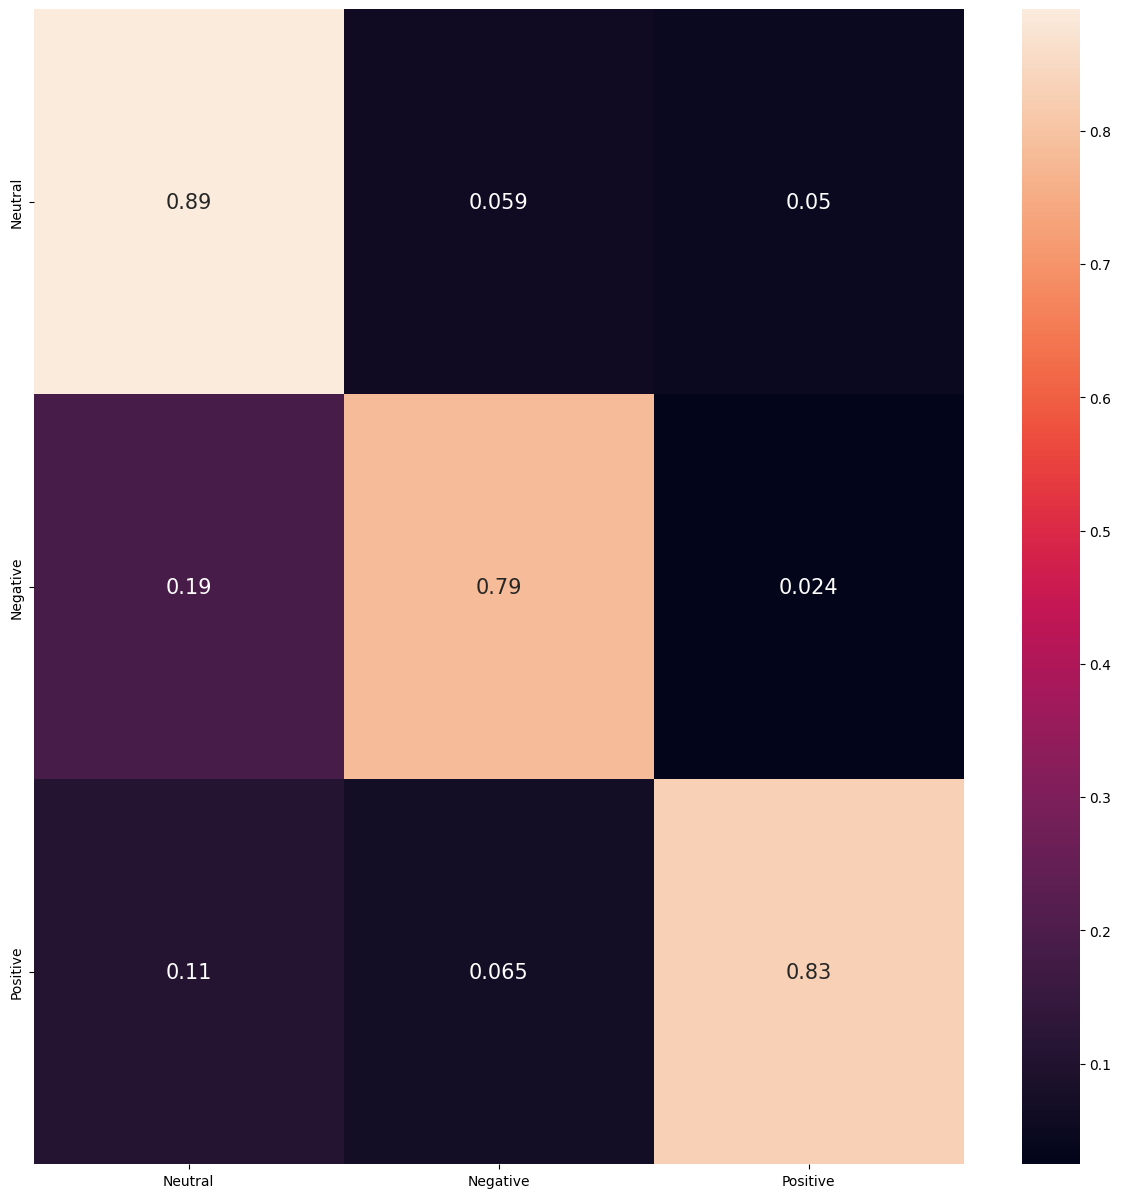

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [21]:
sentiment = ['Neutral','Negative','Positive']

In [22]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want my money back'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 28ms/step


'Negative'

In [23]:
sequence = tokenizer.texts_to_sequences(['i really loved how the technician helped me with the issue that i had'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 23ms/step


'Positive'

In [24]:
sequence = tokenizer.texts_to_sequences(['you are stupid'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 23ms/step


'Negative'

In [25]:
sequence = tokenizer.texts_to_sequences(['you are stupidly good '])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'Positive'

In [26]:
sequence = tokenizer.texts_to_sequences(['you are good stupid'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 23ms/step


'Neutral'

In [27]:
sequence = tokenizer.texts_to_sequences(['Cant you walk straight?'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 26ms/step


'Neutral'

In [28]:
sequence = tokenizer.texts_to_sequences(['Cant you shoot your brother?'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(final_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 26ms/step


'Neutral'